In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import catboost as cv
from xgboost import XGBClassifier
from flaml import AutoML
import seaborn  as sns
plt.style.use('ggplot')

2024-06-04 14:24:40,985	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-04 14:24:42,149	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


# Load the Data

In [4]:
data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


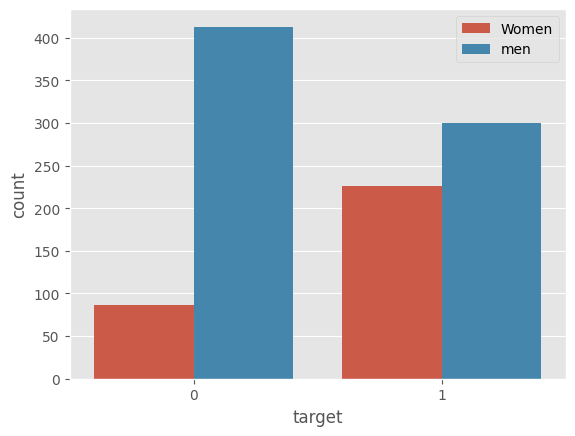

In [7]:
#Target sns.count
sns.countplot(data=data,x='target',hue='sex')
plt.legend(['Women',"men"])

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Statistics**

This is the summary of the statistics for the dataset:

* The average age of the patients is around 54.4 years.
* About 69.6% of the patients are male.
* The average resting blood pressure is 131.6 mm Hg.
* The average cholesterol level is 246 mg/dl.
* The mean maximum heart rate achieved is 149.1 bpm.

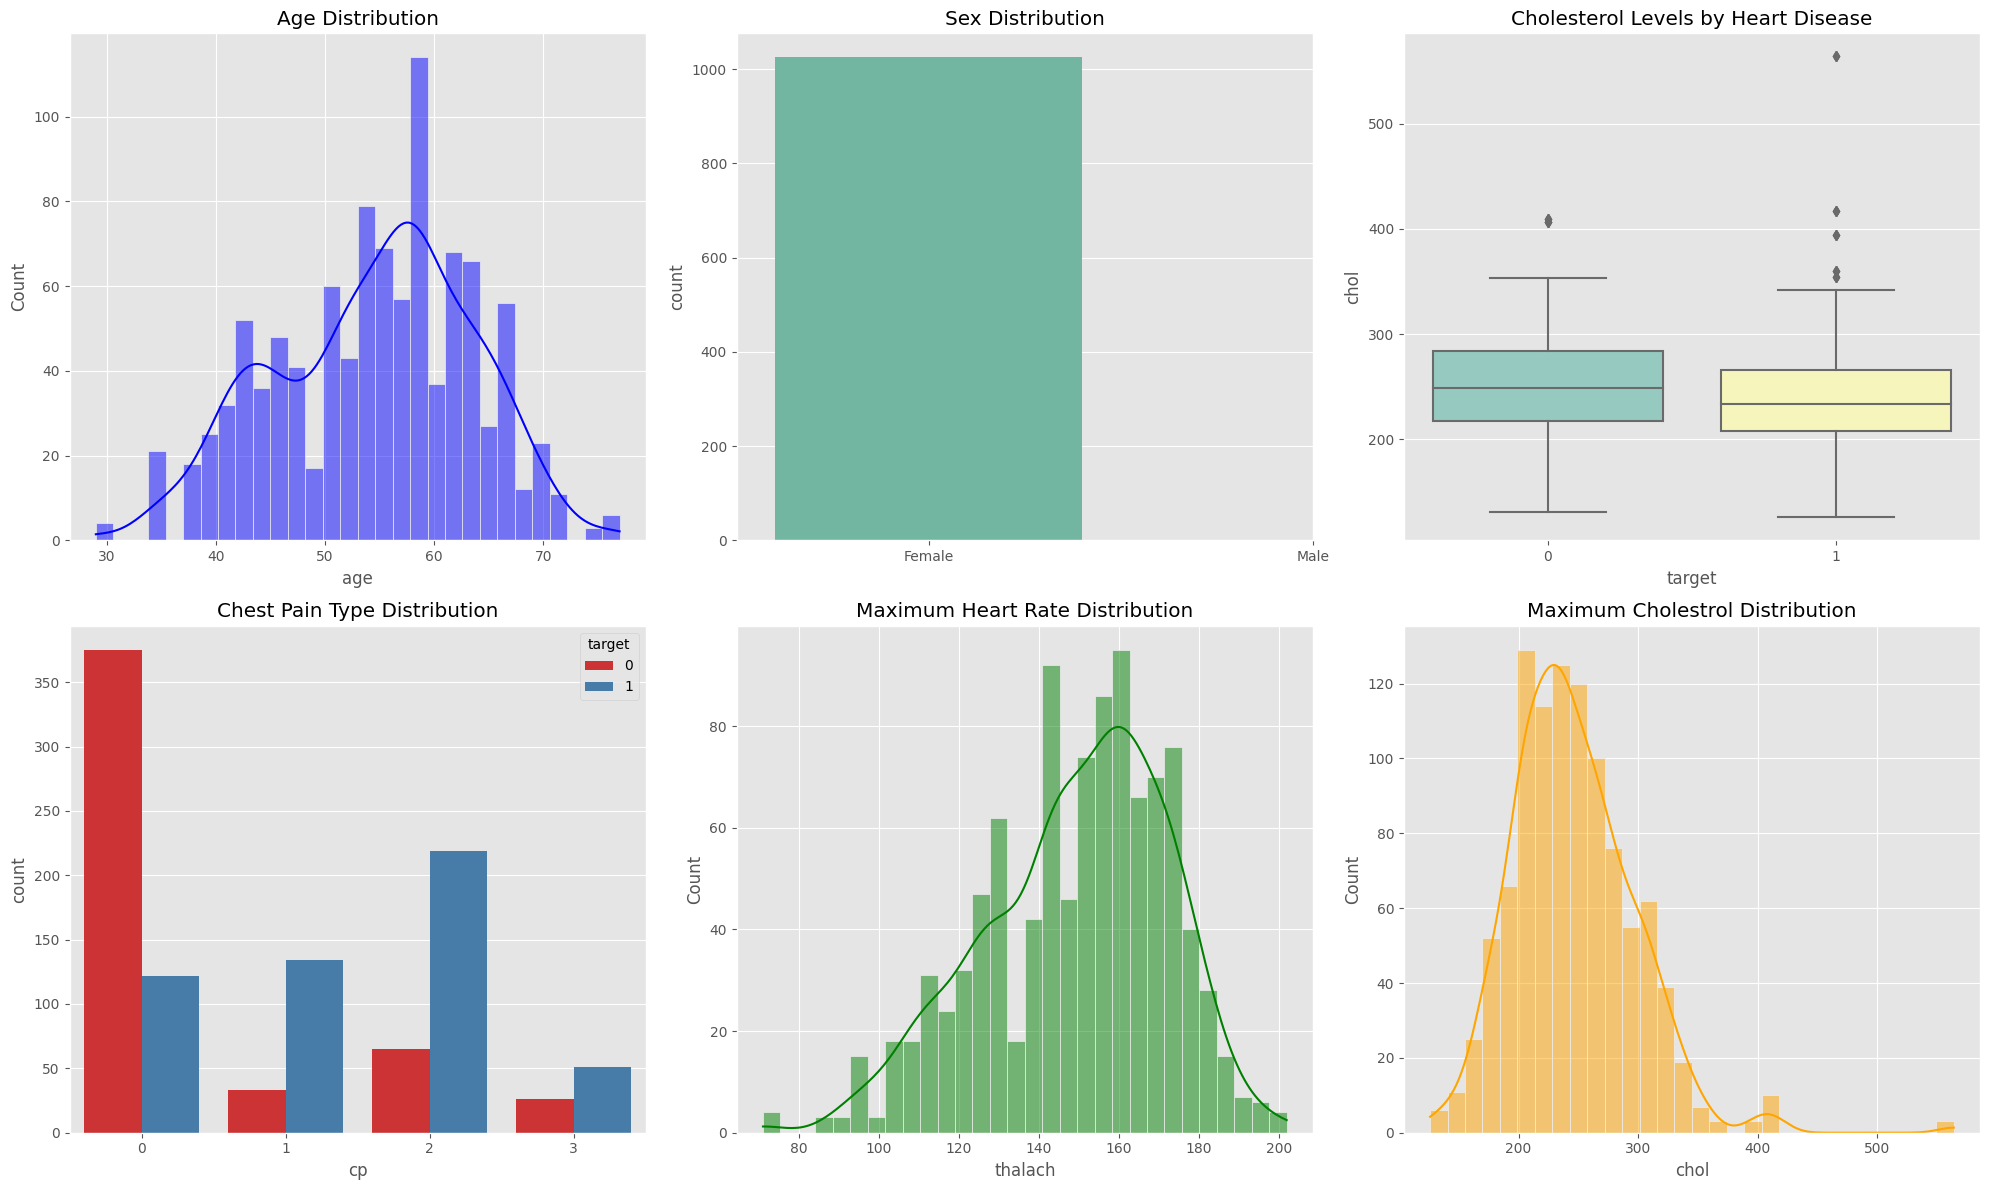

In [9]:
# subplots for Visualizations
plt.figure(figsize=(20, 12))
# Distribution of age
plt.subplot(2, 3, 1)
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')

# Distribution of sex
plt.subplot(2, 3, 2)
sns.countplot(data['sex'], palette='Set2')
plt.title('Sex Distribution')
plt.xticks([0, 1], ['Female', 'Male'])

# Box plot for cholesterol levels
plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='chol', data=data, palette='Set3')
plt.title('Cholesterol Levels by Heart Disease')

# Count plot for chest pain type
plt.subplot(2, 3, 4)
sns.countplot(x='cp', hue='target', data=data, palette='Set1')
plt.title('Chest Pain Type Distribution')

# Distribution of maximum heart rate achieved
plt.subplot(2, 3, 5)
sns.histplot(data['thalach'], kde=True, bins=30, color='green')
plt.title('Maximum Heart Rate Distribution')

plt.subplot(2,3,6)
sns.histplot(data['chol'],kde=True,bins = 30,color='orange')
plt.title('Maximum Cholestrol Distribution')
plt.tight_layout()
plt.show()


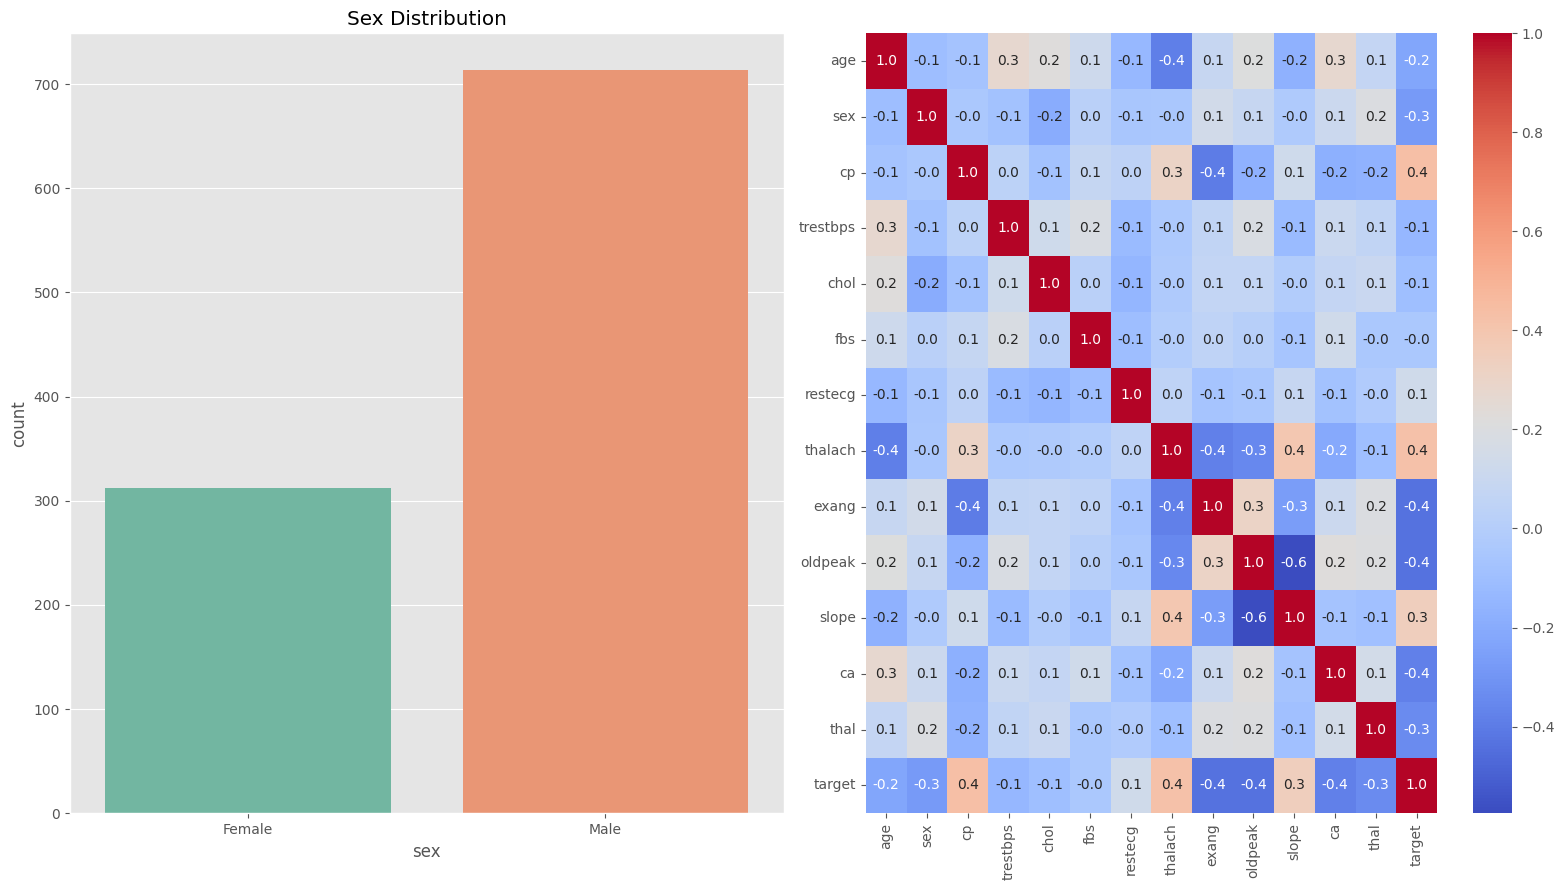

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of sex
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.countplot(data=data,x='sex', palette='Set2')
plt.title('Sex Distribution')
plt.xticks([0, 1], ['Female', 'Male'])
plt.subplot(1,2,2)
data_coerr=data.corr()
sns.heatmap(data_coerr,cmap='coolwarm',annot=True,fmt='.1f')
plt.tight_layout()

**Reading The Co_relation Matrix**
* thalach (maximum heart rate) has a strong positive correlation with the target (0.42).
* cp (chest pain type) also shows a significant positive correlation with the target (0.43).
* exang (exercise induced angina), oldpeak (ST depression), and ca (number of major vessels) have negative correlations with the target (-0.44, -0.44, and -0.38 respectively).

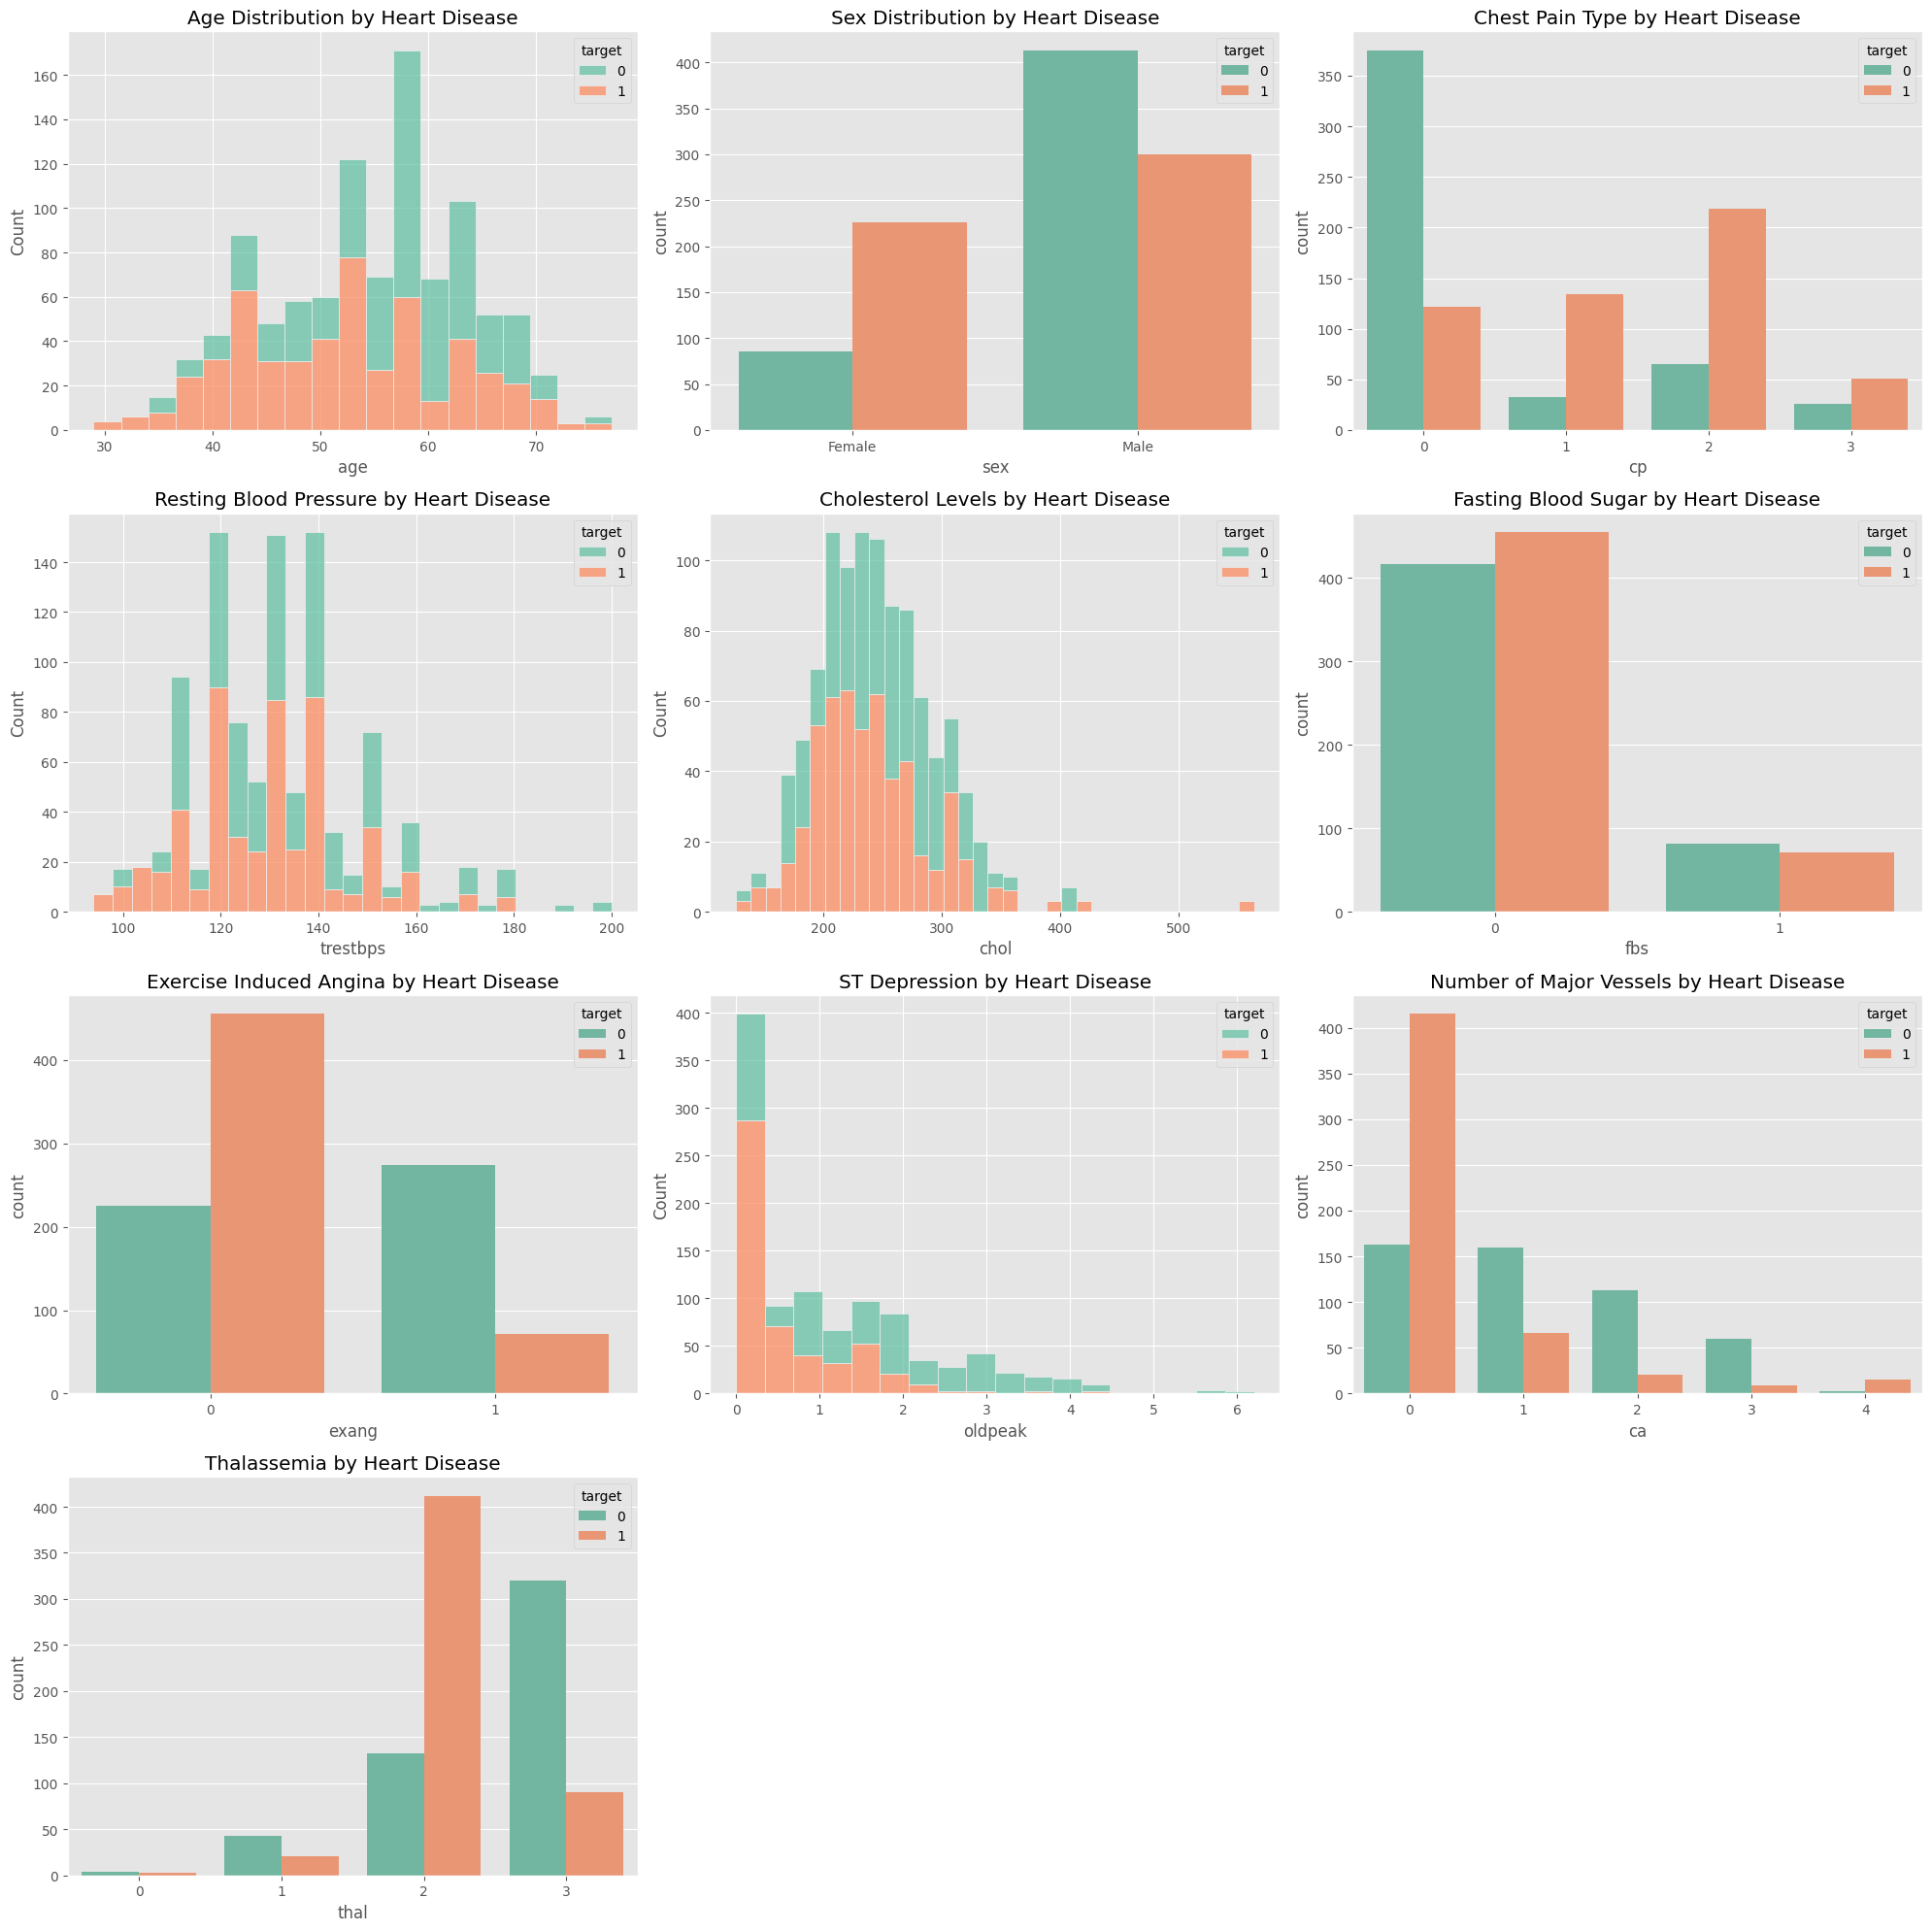

In [11]:
# Subplots for  visualizations
plt.figure(figsize=(20, 20))

# Age and Heart Disease
plt.subplot(4, 3, 1)
sns.histplot(data=data, x='age', hue='target', multiple='stack', palette='Set2')
plt.title('Age Distribution by Heart Disease')

# Sex and Heart Disease
plt.subplot(4, 3, 2)
sns.countplot(data=data, x='sex', hue='target', palette='Set2')
plt.title('Sex Distribution by Heart Disease')
plt.xticks([0, 1], ['Female', 'Male'])

# Chest Pain Type and Heart Disease
plt.subplot(4, 3, 3)
sns.countplot(data=data, x='cp', hue='target', palette='Set2')
plt.title('Chest Pain Type by Heart Disease')

# Resting Blood Pressure and Heart Disease
plt.subplot(4, 3, 4)
sns.histplot(data=data, x='trestbps', hue='target', multiple='stack', palette='Set2')
plt.title('Resting Blood Pressure by Heart Disease')

# Cholesterol Levels and Heart Disease
plt.subplot(4, 3, 5)
sns.histplot(data=data, x='chol', hue='target', multiple='stack', palette='Set2')
plt.title('Cholesterol Levels by Heart Disease')

# Fasting Blood Sugar and Heart Disease
plt.subplot(4, 3, 6)
sns.countplot(data=data, x='fbs', hue='target', palette='Set2')
plt.title('Fasting Blood Sugar by Heart Disease')

# Exercise Induced Angina and Heart Disease
plt.subplot(4, 3, 7)
sns.countplot(data=data, x='exang', hue='target', palette='Set2')
plt.title('Exercise Induced Angina by Heart Disease')

# ST Depression and Heart Disease
plt.subplot(4, 3, 8)
sns.histplot(data=data, x='oldpeak', hue='target', multiple='stack', palette='Set2')
plt.title('ST Depression by Heart Disease')

# Number of Major Vessels and Heart Disease
plt.subplot(4, 3, 9)
sns.countplot(data=data, x='ca', hue='target', palette='Set2')
plt.title('Number of Major Vessels by Heart Disease')

# Thalassemia and Heart Disease
plt.subplot(4, 3, 10)
sns.countplot(data=data, x='thal', hue='target', palette='Set2')
plt.title('Thalassemia by Heart Disease')

plt.tight_layout()
plt.show()


**Final Insights from the Heart Data**
1. **Age**: Increased likelihood of heart disease, especially for individuals above 50 years.
1. **Sex**: Higher prevalence of heart disease in males compared to females.
1. **Chest Pain Type**: Types 1 and 2 chest pain are more frequently associated with heart disease.
1. **Resting Blood Pressure**: Higher levels observed more frequently in patients with heart disease.
1. **Cholesterol Levels**: Wide range observed, but higher levels are common in patients with heart disease.
1. **Fasting Blood Sugar**: Elevated levels (fbs = 1) are slightly more common in heart disease patients.
1. **Exercise Induced Angina**: More common in patients with heart disease.
1. **ST Depression**: Higher levels (oldpeak) observed in heart disease patients.
1. **Number of Major Vessels**: Higher count of major vessels colored by fluoroscopy correlates with heart disease.
1. **Thalassemia**: Types 2 and 3 are more prevalent in heart disease patients.

# Normalize the Data before Training

In [12]:
#normalization of the data
scaler = StandardScaler()
X= data.drop('target',axis =1 )
y =data['target']
scaled_df = scaler.fit_transform(X)
X_scaled=pd.DataFrame(scaled_df,columns =X.columns)

In [13]:
X_scaled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.431402e-16,1.802352e-16,5.545699e-17,-7.036106e-16,-3.466062e-18,-4.159275e-17,-8.318549e-17,-4.332578e-16,-7.625337e-17,-2.426243e-16,1.854343e-16,1.819683e-17,2.530225e-16
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-1.511706e+00,-9.157554e-01,-2.148237e+00,-2.327054e+00,-4.188779e-01,-1.004049e+00,-3.397080e+00,-7.122871e-01,-9.123291e-01,-2.243675e+00,-7.319715e-01,-3.746070e+00
25%,-7.095548e-01,-1.511706e+00,-9.157554e-01,-6.632165e-01,-6.787242e-01,-4.188779e-01,-1.004049e+00,-7.442713e-01,-7.122871e-01,-9.123291e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01
50%,1.726817e-01,6.615041e-01,5.593123e-02,-9.205458e-02,-1.163527e-01,-4.188779e-01,8.912549e-01,1.255019e-01,-7.122871e-01,-2.311765e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01
75%,7.240794e-01,6.615041e-01,1.027618e+00,4.791073e-01,5.623715e-01,-4.188779e-01,8.912549e-01,7.343432e-01,1.403928e+00,6.202642e-01,9.954333e-01,2.386246e-01,1.089852e+00
max,2.488552e+00,6.615041e-01,1.999305e+00,3.906079e+00,6.166694e+00,2.387330e+00,2.786558e+00,2.299935e+00,1.403928e+00,4.366603e+00,9.954333e-01,3.150413e+00,1.089852e+00


# Data validation


In [14]:
X_train,X_valid,y_train,y_valid=train_test_split(X_scaled,y,test_size=0.8,random_state=42)

# Model Training

In [15]:

automl = AutoML()
automl.fit(X_train, y_train, time_budget=60)
y_pred=automl.predict(X_valid)

[flaml.automl.logger: 06-04 14:24:53] {1680} INFO - task = classification
[flaml.automl.logger: 06-04 14:24:53] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 06-04 14:24:53] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 06-04 14:24:53] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-04 14:24:53] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-04 14:24:53] {2345} INFO - Estimated sufficient time budget=1151s. Estimated necessary time budget=28s.
[flaml.automl.logger: 06-04 14:24:53] {2392} INFO -  at 0.1s,	estimator lgbm's best error=0.0956,	best estimator lgbm's best error=0.0956
[flaml.automl.logger: 06-04 14:24:53] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-04 14:24:53] {2392} INFO -  at 0.2s,	estimator lgbm's best error=0.0956,	best estimator lgbm's best error=0.0956
[flaml.automl.logger: 0

# Confusion Matrix

Accuarcy is  0.8719512195121951


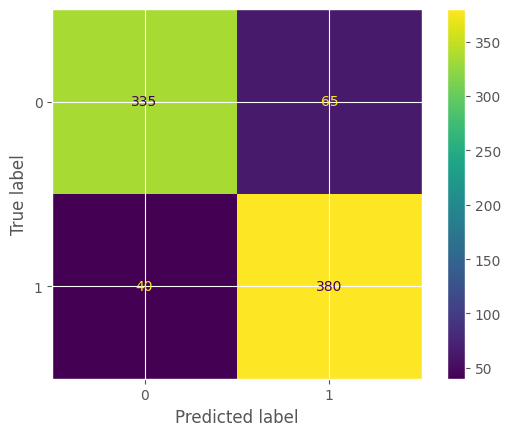

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
ConfusionMatrixDisplay.from_predictions(y_valid,y_pred)
print('Accuarcy is ',accuracy_score(y_valid,y_pred))